# Introduction
## Background to HS2
HS2 is a high speed rail link that is being built within the United Kingdom (UK) to improve the connection between the North and South of England.  The first stage of this project is to build a high speed line between London and Birmingham.  Subsequent stages will connect cities further North such as Leeds and Manchester.

London is the UK’s capital located in the south and Birmingham is the UK’s second largest city located in the centre, in an area known as the Midlands.  The London terminal of HS2 will be at Euston and the Birmingham terminal at Curzon Street.  

The aim of HS2 is to drive economic growth north of London.  The initial business case determined that there would be a return of £2 on every £1 invested.  That has been challenged due to the rising costs of the project potentially, doubling since the initial business case in 2013.

## The Curzon Street Terminal
The Curzon Street terminal is located near the centre of Birmingham.  Its location connects it to 2 other rail stations in in Birmingham, namely Moor Street and New Street.  Allowing easy onward travel to other parts of the UK.

Part of the economic growth will come from increased spending within the vicinity of the Curzon Street terminal both by people passing through and it becoming a more desirable destination.  The terminal is located by the iconic Bull Ring shopping centre.


## The Problem
The full economic benefits to the area surrounding the Curzon Street terminal will only be available if the right venues are in place to service the traffic and tourists it generates.  The first stage in this is understanding the existing venues in the immediate area.  The immediate area, for this report being with 3k circa 1.9 miles, being a reasonable walking distance.

## The Audience
This investigation will be of benefit to a number of different audiences:

HS2:  to determine how they support the wider development of the area to drive traffic on the London Birmingham link

Birmingham City Council:  to inform planning policy and decisions to encourage the most appropriate development of the surrounding area to promote the wealth and well-being of their residents

Developers & Businesses:  to inform investment decisions in the area, both in new businesses and buildings.





In [1]:
# Install required libraries and modules

!pip install folium # Install Folium to enable information to be displayed on map

import folium
from folium.plugins import FastMarkerCluster

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import re to enable postcode extraction

import re






     |████████████████████████████████| 93 kB 2.3 MB/s eta 0:00:011


The Curzon Street terminal is located at 
Latitude: 52° 28' 32.27" N ( 52.4756314308)
Longitude: -1° 53' 6.55" W (-1.88515312604
Source:  https://latitude.to/articles-by-country/gb/united-kingdom/28779/curzon-street-railway-station

In [4]:
# Mark the terminal on a map centred on birmingham

cslat = 52.4756314308 
cslong= -1.88515312604
cs=[cslat, cslong]

map_cs = folium.Map(location= cs, zoom_start=13)
folium.Marker(cs, popup='Curzon Street HS2 Terminal').add_to(map_cs)

# 
map_cs


Information on amenities in the area can be retrieved from FourSquare

In [5]:
# Obtain a list of venues within 500 metere of Curzon Street Terminal from FourSquare


CLIENT_ID = 'DELETED' # Foursquare ID
CLIENT_SECRET = 'DELETED' # Foursquare Secret
VERSION = '20180605' 
LIMIT = 500
RADIUS = 12000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            cslat, 
            cslong, 
            RADIUS, 
            LIMIT)

results = requests.get(url).json()["response"]['groups'][0]['items']

results


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '51d70128498ef30e94e9f569',
   'name': 'Digbeth Dining Club',
   'location': {'address': 'Spot*light Unit 2',
    'crossStreet': 'Lower Trinity St',
    'lat': 52.475385298837345,
    'lng': -1.8829814431038692,
    'labeledLatLngs': [{'label': 'display',
      'lat': 52.475385298837345,
      'lng': -1.8829814431038692}],
    'distance': 149,
    'postalCode': 'B5 6DY',
    'cc': 'GB',
    'neighborhood': 'Digbeth',
    'city': 'Birmingham',
    'state': 'West Midlands',
    'country': 'United Kingdom',
    'formattedAddress': ['Spot*light Unit 2 (Lower Trinity St)',
     'Birmingham',
     'West Midlands',
     'B5 6DY',
     'United Kingdom']},
   'categories': [{'id': '53e0feef498e5aac066fd8a9',
     'name': 'Street Food Gathering',
     'pluralName': 'Street Food Gatherings',
     'shortName': 'Street Food Gathering',

In [6]:
# Extract Relevant Information into a data frame (from venue name, category name, lat, long)

venues_list =[]

venues_list.append([(
    #    cslat,
     #   cslong,
    v['venue']['name'], 
    v['venue']['location']['lat'], 
    v['venue']['location']['lng'],     
    v['venue']['categories'][0]['name']) for v in results])



In [7]:
# Create Data Frame for nearby venues

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

# Add Column headers

nearby_venues.columns=['name','lat','long','category']

nearby_venues.head()
                 


,name,lat,long,category
0,Digbeth Dining Club,52.475385,-1.882981,Street Food Gathering
1,Ghetto Golf,52.475889,-1.883370,Mini Golf
2,Krispy Kreme,52.478034,-1.892792,Donut Shop
3,Birmingham Hippodrome,52.474471,-1.897573,Theater
4,Quarter Horse Coffee,52.471454,-1.899532,Coffee Shop


In [8]:
# Flattne the Json results file into a data frame (note category is within a string in categories so this is added back on using the nearby venues data frame)

nearby_venues2 = json_normalize(results) # flatten JSON

nearby_venues2


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.neighborhood,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,e-0-51d70128498ef30e94e9f569-0,0,"[{'summary': 'This spot is popular', 'type': '...",51d70128498ef30e94e9f569,Digbeth Dining Club,Spot*light Unit 2,Lower Trinity St,52.475385,-1.882981,"[{'label': 'display', 'lat': 52.47538529883734...",149,B5 6DY,GB,Digbeth,Birmingham,West Midlands,United Kingdom,"[Spot*light Unit 2 (Lower Trinity St), Birming...","[{'id': '53e0feef498e5aac066fd8a9', 'name': 'S...",0,[],NaN
1,e-0-59f4c594c5b11c12c8fc293e-1,0,"[{'summary': 'This spot is popular', 'type': '...",59f4c594c5b11c12c8fc293e,Ghetto Golf,"Custard Factory, Gibb St.",NaN,52.475889,-1.883370,"[{'label': 'display', 'lat': 52.47588910338219...",124,B9 4AA,GB,Digbeth,Birmingham,West Midlands,United Kingdom,"[Custard Factory, Gibb St., Birmingham, West M...","[{'id': '52e81612bcbc57f1066b79eb', 'name': 'M...",0,[],NaN
2,e-0-4bcdadfe0687ef3bfd36e1cc-2,0,"[{'summary': 'This spot is popular', 'type': '...",4bcdadfe0687ef3bfd36e1cc,Krispy Kreme,"Upper Mall East, Bull Ring, West Midlands",Bullring Shopping Centre,52.478034,-1.892792,"[{'label': 'display', 'lat': 52.4780337, 'lng'...",582,B5 4BP,GB,NaN,Birmingham,West Midlands,United Kingdom,"[Upper Mall East, Bull Ring, West Midlands (Bu...","[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",0,[],NaN
3,e-0-4b05882ff964a52056b722e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4b05882ff964a52056b722e3,Birmingham Hippodrome,Hurst St,at Inge St,52.474471,-1.897573,"[{'label': 'display', 'lat': 52.47447118981007...",851,B5 4TB,GB,NaN,Birmingham,West Midlands,United Kingdom,"[Hurst St (at Inge St), Birmingham, West Midla...","[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",0,[],NaN
4,e-0-54e35a12498e7eda5e358ac4-4,0,"[{'summary': 'This spot is popular', 'type': '...",54e35a12498e7eda5e358ac4,Quarter Horse Coffee,88-90 Bristol St,NaN,52.471454,-1.899532,"[{'label': 'display', 'lat': 52.47145395252696...",1080,B5 7AH,GB,NaN,Birmingham,West Midlands,United Kingdom,"[88-90 Bristol St, Birmingham, West Midlands, ...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN
5,e-0-5165b0cee4b0c1c41ac988f8-5,0,"[{'summary': 'This spot is popular', 'type': '...",5165b0cee4b0c1c41ac988f8,Adams,"New Oxford House, 16 Waterloo St",NaN,52.479797,-1.901482,"[{'label': 'display', 'lat': 52.4797974141386,...",1200,B2 5UG,GB,City Centre,Birmingham,West Midlands,United Kingdom,"[New Oxford House, 16 Waterloo St, Birmingham,...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN
6,e-0-5d5bbda5c470680008a2ed9a-6,0,"[{'summary': 'This spot is popular', 'type': '...",5d5bbda5c470680008a2ed9a,200 Degrees Coffee,12 Lower Temple St,NaN,52.478801,-1.899521,"[{'label': 'display', 'lat': 52.478801, 'lng':...",1036,B2 4JD,GB,NaN,Birmingham,West Midlands,United Kingdom,"[12 Lower Temple St, Birmingham, West Midlands...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN
7,e-0-4b1a85c5f964a52097eb23e3-7,0,"[{'summary': 'This spot is popular', 'type': '...",4b1a85c5f964a52097eb23e3,Selfridges & Co,Upper East Mall,Bullring Shopping Centre,52.477875,-1.892392,"[{'label': 'display', 'lat': 52.477875, 'lng':...",550,B5 4BP,GB,City Centre,Birmingham,West Midlands,United Kingdom,"[Upper East Mall (Bullring Shopping Centre), B...","[{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...",0,[],NaN
8,e-0-579f397538fae16662c83220-8,0,"[{'summary': 'This spot is popular', 'type': '...",579f397538fae16662c83220,200 Degrees Coffee,21-23 Colmore Row,NaN,52.481784,-1.898328,"[{'label': 'display', 'lat': 52.48178393527601...",1125,B3 2BH,GB,City Centre,Birmingham,West Midlands,Un

In [9]:
# Rename columns

nearby_venues2.rename(columns={'venue.location.postalCode': 'postcode','venue.location.neighborhood': 'district'}, inplace = True)

nearby_venues2.head()



,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,postcode,venue.location.cc,district,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,e-0-51d70128498ef30e94e9f569-0,0,"[{'summary': 'This spot is popular', 'type': '...",51d70128498ef30e94e9f569,Digbeth Dining Club,Spot*light Unit 2,Lower Trinity St,52.475385,-1.882981,"[{'label': 'display', 'lat': 52.47538529883734...",149,B5 6DY,GB,Digbeth,Birmingham,West Midlands,United Kingdom,"[Spot*light Unit 2 (Lower Trinity St), Birming...","[{'id': '53e0feef498e5aac066fd8a9', 'name': 'S...",0,[],NaN
1,e-0-59f4c594c5b11c12c8fc293e-1,0,"[{'summary': 'This spot is popular', 'type': '...",59f4c594c5b11c12c8fc293e,Ghetto Golf,"Custard Factory, Gibb St.",NaN,52.475889,-1.883370,"[{'label': 'display', 'lat': 52.47588910338219...",124,B9 4AA,GB,Digbeth,Birmingham,West Midlands,United Kingdom,"[Custard Factory, Gibb St., Birmingham, West M...","[{'id': '52e81612bcbc57f1066b79eb', 'name': 'M...",0,[],NaN
2,e-0-4bcdadfe0687ef3bfd36e1cc-2,0,"[{'summary': 'This spot is popular', 'type': '...",4bcdadfe0687ef3bfd36e1cc,Krispy Kreme,"Upper Mall East, Bull Ring, West Midlands",Bullring Shopping Centre,52.478034,-1.892792,"[{'label': 'display', 'lat': 52.4780337, 'lng'...",582,B5 4BP,GB,NaN,Birmingham,West Midlands,United Kingdom,"[Upper Mall East, Bull Ring, West Midlands (Bu...","[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",0,[],NaN
3,e-0-4b05882ff964a52056b722e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4b05882ff964a52056b722e3,Birmingham Hippodrome,Hurst St,at Inge St,52.474471,-1.897573,"[{'label': 'display', 'lat': 52.47447118981007...",851,B5 4TB,GB,NaN,Birmingham,West Midlands,United Kingdom,"[Hurst St (at Inge St), Birmingham, West Midla...","[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",0,[],NaN
4,e-0-54e35a12498e7eda5e358ac4-4,0,"[{'summary': 'This spot is popular', 'type': '...",54e35a12498e7eda5e358ac4,Quarter Horse Coffee,88-90 Bristol St,NaN,52.471454,-1.899532,"[{'label': 'display', 'lat': 52.47145395252696...",1080,B5 7AH,GB,NaN,Birmingham,West Midlands,United Kingdom,"[88-90 Bristol St, Birmingham, West Midlands, ...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN


In [10]:
# Append Postcode and District to file containing data

nearby_venues['postcode']=nearby_venues2['postcode']
nearby_venues['district']=nearby_venues2['district']


nearby_venues

,name,lat,long,category,postcode,district
0,Digbeth Dining Club,52.475385,-1.882981,Street Food Gathering,B5 6DY,Digbeth
1,Ghetto Golf,52.475889,-1.883370,Mini Golf,B9 4AA,Digbeth
2,Krispy Kreme,52.478034,-1.892792,Donut Shop,B5 4BP,NaN
3,Birmingham Hippodrome,52.474471,-1.897573,Theater,B5 4TB,NaN
4,Quarter Horse Coffee,52.471454,-1.899532,Coffee Shop,B5 7AH,NaN
5,Adams,52.479797,-1.901482,Restaurant,B2 5UG,City Centre
6,200 Degrees Coffee,52.478801,-1.899521,Coffee Shop,B2 4JD,NaN
7,Selfridges & Co,52.477875,-1.892392,Department Store,B5 4BP,City Centre
8,200 Degrees Coffee,52.481784,-1.898328,Coffee Shop,B3 2BH,City Centre
9,The Electric,52.476811,-1.898869,Indie Movie Theater,B5 4DY,City Centre


In [11]:
# Split postcode (need district)

regex = "^(?:(?P<a1>[Gg][Ii][Rr])(?P<d1>) (?P<s1>0)(?P<u1>[Aa]{2}))|(?:(?:(?:(?P<a2>[A-Za-z])(?P<d2>[0-9]{1,2}))|(?:(?:(?P<a3>[A-Za-z][A-Ha-hJ-Yj-y])(?P<d3>[0-9]{1,2}))|(?:(?:(?P<a4>[A-Za-z])(?P<d4>[0-9][A-Za-z]))|(?:(?P<a5>[A-Za-z][A-Ha-hJ-Yj-y])(?P<d5>[0-9]?[A-Za-z]))))) (?P<s2>[0-9])(?P<u2>[A-Za-z]{2}))$"
pc_parts= nearby_venues['postcode'].str.extract(regex, re.IGNORECASE, expand=True)

pc_parsed = nearby_venues
pc_parsed['postcode_area'] = pd.concat([pc_parts[['a%s'%i]] for i in range(1,6)], axis=1).bfill(axis=1).iloc[:,0]
pc_parsed['postcode_district_part'] = pd.concat([pc_parts[['d%s'%i]] for i in range(1,6)], axis=1).bfill(axis=1).iloc[:,0]
#pc_parsed['postcode_sector_part'] = pd.concat([pc_parts[['s%s'%i]] for i in range(1,3)], axis=1).bfill(axis=1).iloc[:,0]
pc_parsed['postcode_district'] = pc_parsed['postcode_area'] + pc_parsed['postcode_district_part']
#pc_parsed['postcode_sector'] = pc_parsed['postcode_area'] + pc_parsed['postcode_district_part'] + ' ' + pc_parsed['postcode_sector_part']
pc_parsed = pc_parsed[['postcode_district']]

# delete postcode area and postcode district part which have been added to dataframe

del nearby_venues['postcode_area']
del nearby_venues['postcode_district_part']

nearby_venues.head()



,name,lat,long,category,postcode,district,postcode_district
0,Digbeth Dining Club,52.475385,-1.882981,Street Food Gathering,B5 6DY,Digbeth,B5
1,Ghetto Golf,52.475889,-1.883370,Mini Golf,B9 4AA,Digbeth,B9
2,Krispy Kreme,52.478034,-1.892792,Donut Shop,B5 4BP,NaN,B5
3,Birmingham Hippodrome,52.474471,-1.897573,Theater,B5 4TB,NaN,B5
4,Quarter Horse Coffee,52.471454,-1.899532,Coffee Shop,B5 7AH,NaN,B5


In [12]:
# Check data types

nearby_venues.dtypes

name                  object
lat                  float64
long                 float64
category              object
postcode              object
district              object
postcode_district     object
dtype: object

Plot the venues on the map

In [13]:
from folium.plugins import FastMarkerCluster

map_cs = folium.Map(location= cs, zoom_start=13)
folium.Marker(cs, popup='Curzon Street HS2 Terminal').add_to(map_cs)


# add a red circle marker to represent the Curzon Street Terminal
folium.CircleMarker(
    cs,
    radius=10,
    color='red',
    popup='Curzon Street Terminal',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_cs)

# add all venues as blue circle markers
for lat, long, category in zip(nearby_venues.lat, nearby_venues.long, nearby_venues.category):
    folium.CircleMarker(
        [lat, long],
        radius=5,
        color='blue',
        popup=category,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_cs)
    
map_cs

This approach was not progressed due to:

•	Limited number of venues retrieved from FourSquare
•	The neighborhood not being provided for most venues
•	The postcode and post district not providing an appropriate level of granularity for analysis (the post district was derived by splitting the postcode)


# Analysis of Venues using Zones

To retrieve a greater number of venues from FourSquare and provide appropriate granularity for analysis a set of zones will be created.  These will be circular zones of 600m diameter in a hexagonal pattern covering venues within 3 km of the Curzon Street terminal.

In [14]:
# Functions to plot zones

!pip install shapely
import shapely.geometry

!pip install pyproj
import pyproj

import math

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)


     |████████████████████████████████| 1.0 MB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 8.2 MB/s eta 0:00:01


In [16]:
# Plot zones (note map appears at end of text on running)

cs_x, cs_y = lonlat_to_xy(cs[1], cs[0]) # City center in Cartesian coordinates

k = math.sqrt(3) / 2 # Vertical offset for hexagonal grid cells
x_min = cs_x - 3000
x_step = 600
y_min = cs_y - 1500  - (int(21/k)*k*600 - 6000)/2
y_step = 600 * k 

latitudes = []
longitudes = []
distances_from_center = []
xs = []
ys = []
for i in range(0, int(21/k)):
    y = y_min + i * y_step
    x_offset = 600 if i%2==0 else 0
    for j in range(0, 21):
        x = x_min + j * x_step + x_offset
        distance_from_center = calc_xy_distance(cs_x, cs_y, x, y)
        if (distance_from_center <= 3001):
            lon, lat = xy_to_lonlat(x, y)
            latitudes.append(lat)
            longitudes.append(lon)
            distances_from_center.append(distance_from_center)
            xs.append(x)
            ys.append(y)
            
# Mark Map and Plot Zones

map_cs = folium.Map(location=cs, zoom_start=13)
folium.Marker(cs, popup='Terminus').add_to(map_cs)
for lat, lon in zip(latitudes, longitudes):
    #folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin) 
    folium.Circle([lat, lon], radius=300, color='blue', fill=False).add_to(map_cs)
    #folium.Marker([lat, lon]).add_to(map_berlin)
map_cs


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:20

In [19]:
# Retrieve FourSquare data for each zone


CLIENT_ID = 'DELETED' # Foursquare ID
CLIENT_SECRET = 'DELETED' # Foursquare Secret
VERSION = '20180605' 
LIMIT = 100
RADIUS = 300

area = 0

zone_lat=[]
zone_long=[]
zone_zone=[]

venues_list =[]

for lat, long in zip(latitudes, longitudes):
    
    area= area + 1
    zone_lat.append(lat)
    zone_long.append(long)
    zone_zone.append(area)
    

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            RADIUS, 
            LIMIT)

    results = requests.get(url).json()["response"]['groups'][0]['items']
    

    venues_list.append([(
        area,
        lat,
        long,
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'], 
        v['venue']['categories'][0]['name']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

# Add Column headers

nearby_venues.columns=['area','clat','clong','name','lat','long','category']

nearby_venues.head()






,area,clat,clong,name,lat,long,category
0,1,52.450291,-1.893044,Heart of England Workplace Training Ltd,52.452579,-1.892105,Business Service
1,1,52.450291,-1.893044,Nima Deli,52.447631,-1.892859,Gourmet Shop
2,2,52.451533,-1.884596,Diwan Balti,52.453767,-1.887040,Indian Restaurant
3,2,52.451533,-1.884596,Tipu Sultan,52.451024,-1.888777,Pakistani Restaurant
4,3,52.452775,-1.876148,Adil's,52.454441,-1.873600,Middle Eastern Restaurant


In [20]:
# Count categories

print('There are {} uniques categories.'.format(len(nearby_venues['category'].unique())))

There are 171 uniques categories.


In [21]:
# check number of results returned

nearby_venues.shape


(623, 7)

In [22]:
# Check zone numbering

zone_zone

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89]

In [23]:
# Map Locations on Map

map_cs = folium.Map(location=cs, zoom_start=13)
folium.Marker(cs, popup='Terminus').add_to(map_cs)
for lat, long, zone in zip(zone_lat, zone_long, zone_zone):
    #folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin) 
    folium.Circle([lat, long], radius=300, color='blue', fill=False).add_to(map_cs)
    folium.Marker([lat, long], popup = zone).add_to(map_cs)
map_cs




In [24]:
# list of areas and lat / long

zone_p = pd.DataFrame(list(zip(zone_zone,zone_lat,zone_long)), columns=['area', 'zlat', 'zlong'])

zone_p.set_index('area', inplace=True)

zone_p.head()

,zlat,zlong
area,,
1,52.450291,-1.893044
2,52.451533,-1.884596
3,52.452775,-1.876148
4,52.454017,-1.867699
5,52.455257,-1.859249


In [25]:
#number of categories in each zone

zones=nearby_venues.groupby('area').count()
zones

,clat,clong,name,lat,long,category
area,,,,,,
1,2,2,2,2,2,2
2,2,2,2,2,2,2
3,11,11,11,11,11,11
4,4,4,4,4,4,4
5,3,3,3,3,3,3
6,6,6,6,6,6,6
7,1,1,1,1,1,1
8,7,7,7,7,7,7
9,10,10,10,10,10,10


In [26]:
# Afd in latitude and longitude for each zone

zones['zlat']=zone_p['zlat']
zones['zlong']=zone_p['zlong']

zones





,clat,clong,name,lat,long,category,zlat,zlong
area,,,,,,,,
1,2,2,2,2,2,2,52.450291,-1.893044
2,2,2,2,2,2,2,52.451533,-1.884596
3,11,11,11,11,11,11,52.452775,-1.876148
4,4,4,4,4,4,4,52.454017,-1.867699
5,3,3,3,3,3,3,52.455257,-1.859249
6,6,6,6,6,6,6,52.453517,-1.903254
7,1,1,1,1,1,1,52.454760,-1.894806
8,7,7,7,7,7,7,52.456003,-1.886357
9,10,10,10,10,10,10,52.457245,-1.877908


In [22]:
# Check max and min number of venues for an area

zones.describe()

#max vale of category is 55 min value is 1

,clat,clong,name,lat,long,category,zlat,zlong
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,7.493976,7.493976,7.493976,7.493976,7.493976,7.493976,52.475725,-1.885514
std,11.850052,11.850052,11.850052,11.850052,11.850052,11.850052,0.013365,0.021744
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.450291,-1.927209
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,52.465191,-1.902740
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,52.475864,-1.885314
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,52.486298,-1.868753
max,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,52.499960,-1.842683


In [29]:

#Plot Curzon Street Terminal with values
map_cs = folium.Map(location=cs, zoom_start=13, tiles='Stamen Toner',)
folium.Marker(cs, popup='Terminus').add_to(map_cs)


#Plot each area
for i in range(0,len(zones)):
     folium.Circle([zones.iloc[i]['zlat'], zones.iloc[i]['zlong']], radius=300, color='blue', fill=True).add_to(map_cs)
        
map_cs

In [31]:
#max vale of category is 55 min value is 1\
# show density of venues

#Plot Curzon Street Terminal with values
map_cs = folium.Map(location=cs, zoom_start=13, tiles='Stamen Toner',)
folium.Marker(cs, popup='Terminus').add_to(map_cs)


#Plot each area
for i in range(0,len(zones)):
    if zones.iloc[i]['category']<5:
        heat='red'
    else:
        if zones.iloc[i]['category']>20:
            heat='green'
        else:
            heat='orange'
    
    folium.Circle([zones.iloc[i]['zlat'], zones.iloc[i]['zlong']], radius=300, color=heat, fill=True).add_to(map_cs)
        
map_cs



In [32]:
# Determine which venues are in which area

nv_oh = pd.get_dummies(nearby_venues[['category']], prefix="", prefix_sep="")

nv_oh['area'] = nearby_venues['area']

#nv_oh.set_index('area', inplace=True)

fixed_columns = [nv_oh.columns[-1]] + list(nv_oh.columns[:-1])
nv_oh = nv_oh[fixed_columns]

nv_oh.head()

,area,Adult Boutique,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Stop,Business Service,Café,Camera Store,Canal,Caribbean Restaurant,Casino,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gay Bar,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lingerie Store,Locksmith,Lounge,Market,Martial Arts School,Men's Store,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Optical Shop,Other Repair Shop,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Record Shop,Rental Car Location,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tunnel,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [33]:
# groupby area

zone_g = nv_oh.groupby('area').mean().reset_index()
zone_g

,area,Adult Boutique,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Stop,Business Service,Café,Camera Store,Canal,Caribbean Restaurant,Casino,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gay Bar,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lingerie Store,Locksmith,Lounge,Market,Martial Arts School,Men's Store,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Optical Shop,Other Repair Shop,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Record Shop,Rental Car Location,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tunnel,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store
0,1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.00,0.500000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0
1,2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00

In [34]:
# Check Shape

zone_g.shape

(81, 172)

In [35]:
# Most Popular Venue Type Function

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
# Determine top 10 Venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['area'] = zone_g['area']

for ind in np.arange(zone_g.shape[0]):
     venues_sorted.iloc[ind, 1:] = return_most_common_venues(nv_oh.iloc[ind, :], num_top_venues)

venues_sorted.head()

,area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Business Service,Event Service,French Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
1,2,Gourmet Shop,Women's Store,Event Service,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,3,Indian Restaurant,Event Service,French Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
3,4,Pakistani Restaurant,Women's Store,Ethiopian Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,5,Middle Eastern Restaurant,Women's Store,Furniture / Home Store,French Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [36]:
#Number of rows

venues_sorted.shape

NameError: name 'venues_sorted' is not defined

In [37]:
# Determine number of clusters with elbow test

zone_c = zone_g.drop('area',1)

distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(zone_c)
    distortions.append(kmeanModel.inertia_)

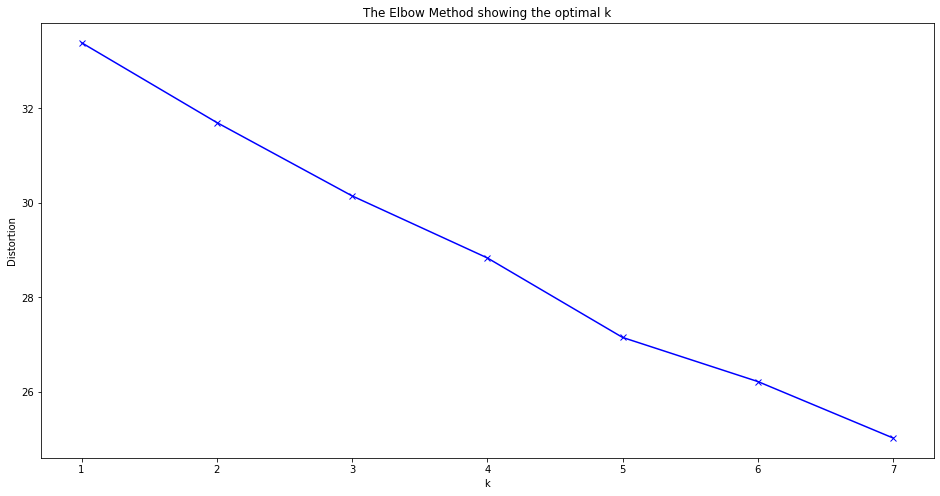

In [38]:
# Plot Elbow

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [39]:
# Flattens at 5


# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(zone_c)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100]



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [42]:
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

zone_m=zone_p



#toronto_merged.head()

zone_m=pd.merge(zone_m, venues_sorted, how='inner', on='area')

zone_m.head()

,area,zlat,zlong,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,52.450291,-1.893044,0,Business Service,Event Service,French Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
1,2,52.451533,-1.884596,0,Gourmet Shop,Women's Store,Event Service,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,3,52.452775,-1.876148,0,Indian Restaurant,Event Service,French Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
3,4,52.454017,-1.867699,0,Pakistani Restaurant,Women's Store,Ethiopian Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
4,5,52.455257,-1.859249,0,Middle Eastern Restaurant,Women's Store,Furniture / Home Store,French Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [43]:
#zone_m.shape

zone_m.dtypes

area                        int64
zlat                      float64
zlong                     float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [47]:
# set color scheme for the clusters (note automatic colours did not stand out on map)
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#rainbow =['#669900','#0000ff','#ff0000', '#990099']
colors_array



array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.96078431e-03, 7.09281308e-01, 9.23289106e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 7.00543038e-01, 3.78411050e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [62]:
#Map Clusters

#Plot Curzon Street Terminal with values
map_cs = folium.Map(location=cs, zoom_start=13, tiles='Stamen Toner')
folium.Marker(cs, popup='Terminus').add_to(map_cs)

cxl=[]


#Plot each cluster
for i in range(0,len(zone_m)):
    cx=zone_m.iloc[i]['Cluster Labels']
    heat=rainbow[cx]
    folium.Circle([zone_m.iloc[i]['zlat'], zone_m.iloc[i]['zlong']], radius=300, color= heat, fill=True, fill_opacity = .6).add_to(map_cs)
#    print (heat, cx)

       
map_cs


Explore the characteristics of each cluster

In [50]:
# Add cluster labels back to unique areas and vensues

zone_cg = nv_oh.groupby('area').sum().reset_index()

zone_cg['cluster']=zone_m['Cluster Labels']
del zone_cg['area']
                         
zone_cg.head()


,Adult Boutique,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Stop,Business Service,Café,Camera Store,Canal,Caribbean Restaurant,Casino,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gay Bar,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lingerie Store,Locksmith,Lounge,Market,Martial Arts School,Men's Store,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Optical Shop,Other Repair Shop,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Record Shop,Rental Car Location,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tunnel,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store,cluster
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [51]:
#GroupBy Cluster and calculate total number of venues in each category
zone_cg = zone_cg.groupby('cluster').sum().reset_index()

zone_cg




,cluster,Adult Boutique,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Stop,Business Service,Café,Camera Store,Canal,Caribbean Restaurant,Casino,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gay Bar,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lingerie Store,Locksmith,Lounge,Market,Martial Arts School,Men's Store,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Optical Shop,Other Repair Shop,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Record Shop,Rental Car Location,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tunnel,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store
0,0,1,2,1,1,1,4,5,3,1,5,26,1,2,1,1,1,2,1,1,9,3,2,3,22,1,2,2,3,8,1,9,11,28,1,4,2,5,1,1,1,2,2,4,1,1,2,2,1,2,3,2,1,1,1,1,1,12,1,2,1,1,2,1,2,1,1,1,9,1,1,2,3,14,3,7,1,1,0,1,3,2,31,3,28,1,1,1,1,13,3,1,1,2,2,1,1,2,1,1,1,1,1,1,4,3,1,1,1,1,1,2,3,1,7,4,2,1,1,5,9,2,2,5,9,1,1,4,1,1,4,1,48,1,2,1,2,8,19,1,1,1,6,2,3,2,1,2,1,2,4,1,9,2,1,3,2,5,1,2,2,1,1,1,6,1,3,1,3,2,2,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [52]:
# zone_cg.dtypes

In [53]:
# Find 10 most common venues for each cluster


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['cluster']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
clusters_sorted = pd.DataFrame(columns=columns)

clusters_sorted['cluster'] = zone_cg['cluster']


for ind in np.arange(zone_cg.shape[0]):
    clusters_sorted.iloc[ind, 1:] = return_most_common_venues(zone_cg.iloc[ind, :], num_top_venues)

clusters_sorted.head()
#zone_cg.head()



,cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Pub,Hotel,Indian Restaurant,Coffee Shop,Bar,Café,Sandwich Place,Grocery Store,Italian Restaurant,Fast Food Restaurant
1,1,Historic Site,Women's Store,Ethiopian Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
2,2,Pub,Women's Store,Ethiopian Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
3,3,Sandwich Place,Ethiopian Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Service
4,4,Fast Food Restaurant,Music Store,Auto Garage,Women's Store,Falafel Restaurant,French Restaurant,Fountain,Food Truck,Food & Drink Shop,Fish & Chips Shop


In [54]:
#Plot Cluster Function

def plotcluster(columns,ca,n):
    t='Curzon Street Terminal Cluster '
    t=t + str(n)
    ts=t+'.png'
    plt.title(t)
    plt.xlabel('Venue')
    plt.ylabel('Number')
    plt.bar(columns,ca, color='blue')
    plt.xticks(
    rotation=45, 
    horizontalalignment='right')
    plt.show()

In [55]:
def createclustergraph(cn):

# Plot Cluster 0

    iter=zone_cg.shape[1]

    print(iter)

    columns=[]
    for i in range(1,6):
        columns.append(clusters_sorted.iloc[cn,i])

    ca=[]

    for i in range(1,iter):
        ca.append(zone_cg.iloc[cn,i])
    ca.sort(reverse=True)
    ca=ca[0:5]

    print(ca)

    plotcluster(columns,ca,cn)



172
[48, 31, 28, 28, 26]


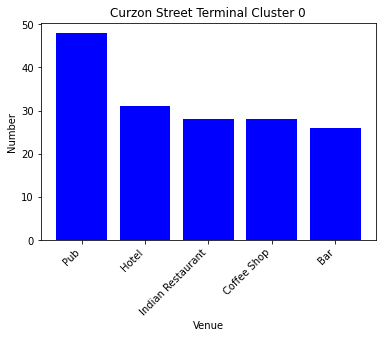

172
[1, 0, 0, 0, 0]


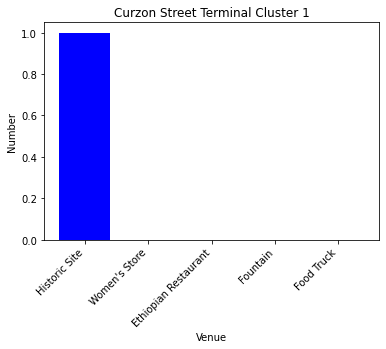

172
[3, 0, 0, 0, 0]


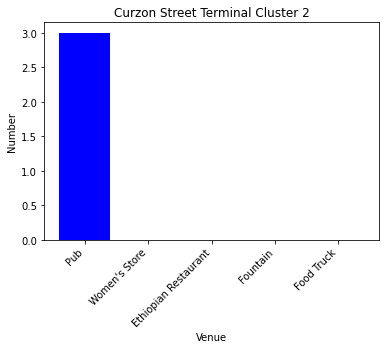

172
[2, 0, 0, 0, 0]


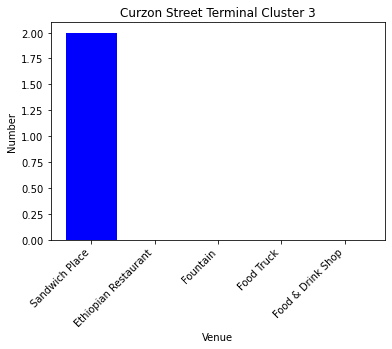

172
[3, 1, 1, 0, 0]


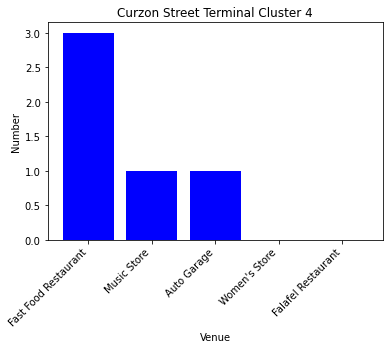

In [56]:
#create cluster graphs

cit=zone_cg.shape[0]

for loop in range(0,cit):
    createclustergraph(loop)


# The End
Analysis of data set out in report and presentation